1\. **Hurricanes per Year**

The number of hurricanes in 2005 was 15. The historic average is 6.3. Is this number signficantly different?
- Assume the number of hurricanes is random, i.e. follows the Poisson distribution.
- Assume as statistically significant a probability that has a Z score of 3 or larger with respect a normal distribution.

**Hint**: compute the probability that in a single year are observed 15 or more hurricances.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# computing the p-value (probability that 15 or more hurricanes are observed in a single year)
# assuming that the number of hurricanes follows the Poisson distribution
k = 15
mu = 6.3
pvalue = 1-stats.poisson.cdf(k, mu)   # one-sided right-tailed test
print("p-value =", pvalue)

# computing the corresponding Z-score w.r.t. a normal distribution
n_tailed = 1
Z = stats.norm.ppf(1-(pvalue/n_tailed))   # n-tailed test
print('Z-score =', Z)

# checking if 'k' is significantly different from 'mu'
Z_critical = 3
print('\nIs the number of hurricanes in 2005 ('+str(k)+') significantly different from the historical average ('+str(mu)+')?', Z >= Z_critical)

p-value = 0.0008444930803583883
Z-score = 3.1400853556957866

Is the number of hurricanes in 2005 (15) significantly different from the historical average (6.3)? True


2\. **Pairwise t-test**

In an experiment, a group of 10 individuals agreed to participate in a study of blood pressure changes following exposure to halogen lighting. Resting systolic blood pressure was recorded for each individual. The participants were then exposed to 20 minutes in a room lit only by halogen lamps. A post-exposure systolic blood pressure reading was recorded for each individual. The results are presented in the following data set:

```python
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])
```

Determine whether the change in blood pressures within our sample was statistically significant.

**Hint:**
in this case, the Student's $t$-test should be performed to compare the two datasets.
Use the following test statistics:

$$T = \frac{\bar{x}_1 - \bar{x}_2}{\sigma \sqrt{\frac{2}{n}}}$$

and 

$$\sigma = \sqrt{\frac{\sigma_1^2 + \sigma_2^2}{2}}$$

In [2]:
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])

# computing 'sigma'
pre_var = np.var(pre, ddof=1)
post_var = np.var(post, ddof=1)
sigma = np.sqrt((pre_var+post_var)/2)
print('sigma =', sigma)

# computing the test statistics 'T'
pre_mean = np.mean(pre)
post_mean = np.mean(post)
n = len(pre)
T = (pre_mean-post_mean)/(sigma*np.sqrt(2/n))
print('T =', T)

# computing the p-value
ndof = n+n-2   # number of degrees of freedom = size of the 'pre' dataset + size of the 'post' dataset - 2
pvalue = stats.t.cdf(-np.abs(T), ndof) + (1-stats.t.cdf(np.abs(T), ndof))   # two-sided test
print("p-value =", pvalue)

# checking if 'pre_mean' is significantly different from 'post_mean'
alpha = 0.05   # significance level
print('\nAt the significance level of '+str(100*alpha)+'%: is the change in blood pressures statistically significant?', pvalue < alpha)

sigma = 11.04158805003459
T = -3.786997938137629
p-value = 0.0013499418313276546

At the significance level of 5.0%: is the change in blood pressures statistically significant? True


3\. **FFT of a simple dataset**

Perform a periodicity analysis on the lynxs-hares population, i.e. determine what is the period of the population of these animals.

In [3]:
import pandas as pd

# loading the dataset 'populations.txt' into a pandas DataFrame 'df'
df = pd.read_csv('populations.txt', sep='\t')
df

,# year,hare,lynx,carrot
0,1900,30000.0,4000.0,48300
1,1901,47200.0,6100.0,48200
2,1902,70200.0,9800.0,41500
3,1903,77400.0,35200.0,38200
4,1904,36300.0,59400.0,40600
5,1905,20600.0,41700.0,39800
6,1906,18100.0,19000.0,38600
7,1907,21400.0,13000.0,42300
8,1908,22000.0,8300.0,44500
9,1909,25400.0,9100.0,42100


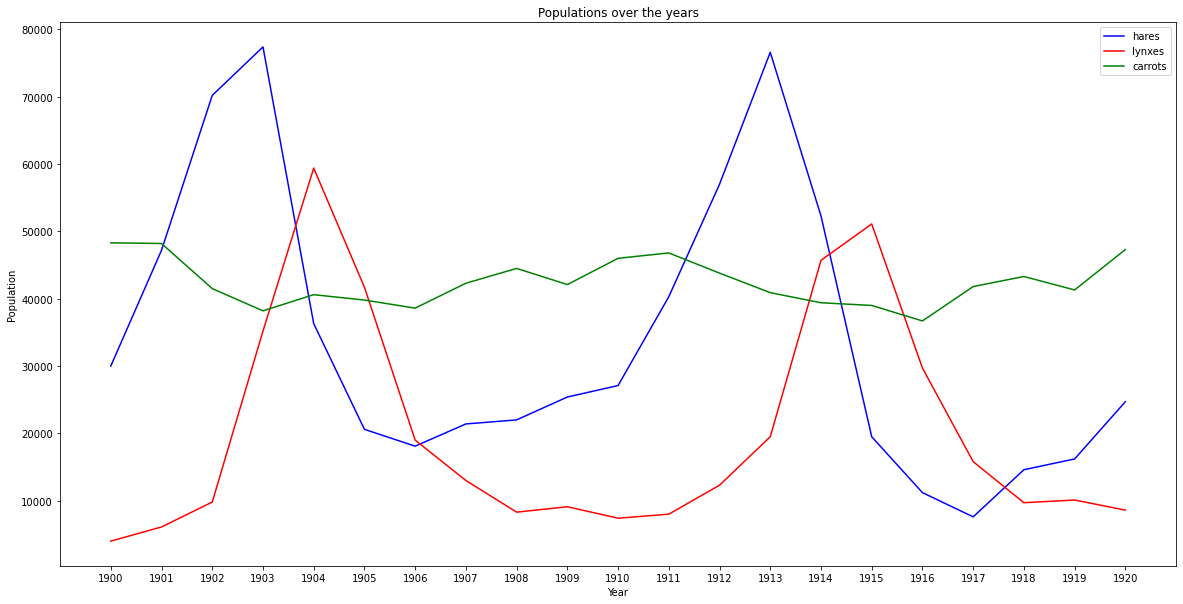

In [4]:
# plotting the three populations over the years
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(df['# year'], df['hare'], color='blue', label='hares')
ax.plot(df['# year'], df['lynx'], color='red', label='lynxes')
ax.plot(df['# year'], df['carrot'], color='green', label='carrots')
ax.set_xlabel('Year')
ax.set_ylabel('Population')
ax.set_title('Populations over the years')
ax.set_xticks(df['# year'])
ax.legend()
plt.show()

In [5]:
from scipy import fftpack

# computing the FFT of the dataset 'df[['hare', 'lynx', 'carrot']]'
pop_names = df.columns[1:]
df_fft = pd.DataFrame(fftpack.fft(df[['hare', 'lynx', 'carrot']], axis=0), columns=pop_names+'_fft')
df_fft

,hare_fft,lynx_fft,carrot_fft
0,7157000000000.0-0.00000000j,4235000000000.0-0.00000000j,890400000000.0-0.0000000j
1,-12514.069528-41299.484332j,-4543.15033200-2873.35518400j,4728.1641290-2078.1745740j
2,89297.433585-255500.904180j,-174675.133391-110711.233158j,41123.247402+8996.081996j
3,5643.5575710+2259.9935060j,-14254.4391680+8839.3092830j,5331.2723840+2692.9477060j
4,-129841.666074-17562.146221j,23006.147290+108899.205746j,8970.5555540-7239.7539240j
5,-4257.7476060+7223.4974150j,5889.236354+011288.6416120j,7440.0304210-2552.6079670j
6,3414.515460+051911.0534960j,20587.8195760-39284.1202630j,11610.604300-10447.619937j
7,5150.0000000+1472.2431860j,-1150.00000000-6321.98544800j,-5250.0000000+4416.7295590j
8,23362.8738850-8859.6377690j,-24698.9466630+1829.9683510j,-2978.0625580+6975.2968820j
9,-3958.0730310+3108.0466980j,1366.61959300-1870.69682000j,-7141.8766840-1140.2939540j


In [6]:
# computing the power spectral density (PSD)
df_psd = (np.abs(df_fft))**2
df_psd.columns = pop_names+'_psd'
df_psd

,hare_psd,lynx_psd,carrot_psd
0,5.122265e+11,1.793522e+11,7.928122e+11
1,1.862249e+09,2.889638e+07,2.667435e+07
2,7.325474e+10,4.276838e+10,1.772051e+09
3,3.695731e+07,2.813224e+08,3.567443e+07
4,1.716729e+10,1.238832e+10,1.328849e+08
5,7.030733e+07,1.621165e+08,6.186986e+07
6,2.706416e+09,1.967100e+09,2.439589e+08
7,2.869000e+07,4.129000e+07,4.707000e+07
8,6.243171e+08,6.133868e+08,5.752362e+07
9,2.532630e+07,5.367156e+06,5.230667e+07


In [7]:
# computing the frequencies corresponding to the values of the PSD
df_fftfreq = fftpack.fftfreq(len(df_psd))
print('Frequencies corresponding to the values of the PSD:\n', df_fftfreq)

Frequencies corresponding to the values of the PSD:
 [ 0.          0.04761905  0.0952381   0.14285714  0.19047619  0.23809524
  0.28571429  0.33333333  0.38095238  0.42857143  0.47619048 -0.47619048
 -0.42857143 -0.38095238 -0.33333333 -0.28571429 -0.23809524 -0.19047619
 -0.14285714 -0.0952381  -0.04761905]


Results for the HARE population:
peak frequency = 0.09523809523809523 (1/year)
period = 10.5 years

Results for the LYNX population:
peak frequency = 0.09523809523809523 (1/year)
period = 10.5 years

Results for the CARROT population:
peak frequency = 0.09523809523809523 (1/year)
period = 10.5 years



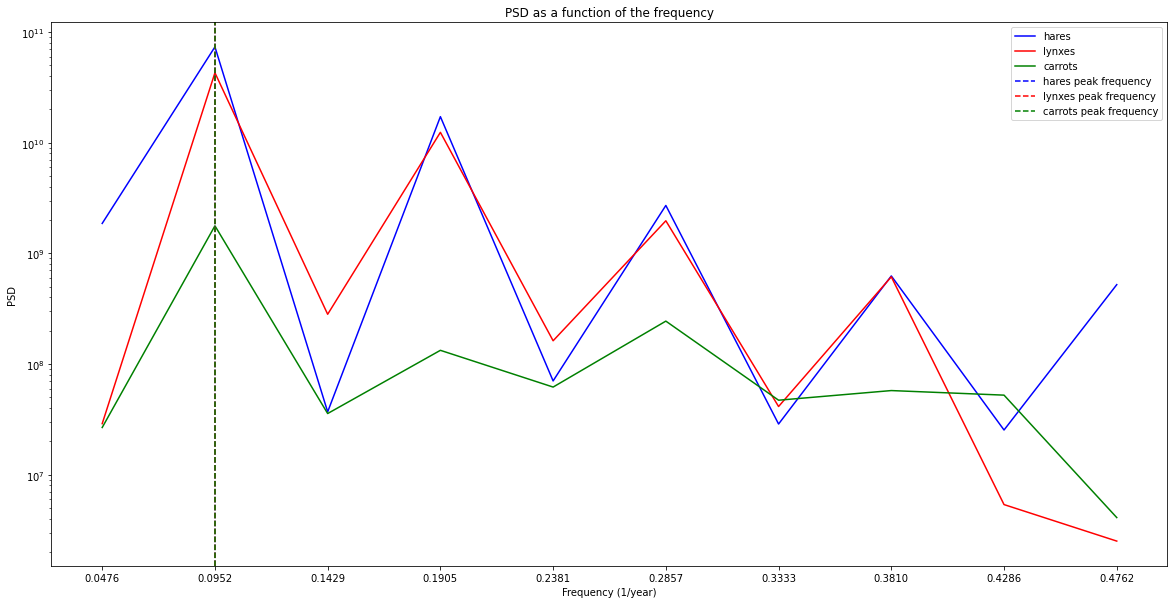

In [8]:
# focusing only on the positive frequencies
pos_mask = (df_fftfreq > 0)
df_fftfreq = df_fftfreq[pos_mask]
df_psd = df_psd[pos_mask]

# plotting the PSD as a function of the frequency (in unit of 1/year)
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(df_fftfreq, df_psd['hare_psd'], color='blue', label='hares')
ax.plot(df_fftfreq, df_psd['lynx_psd'], color='red', label='lynxes')
ax.plot(df_fftfreq, df_psd['carrot_psd'], color='green', label='carrots')
ax.set_xlabel('Frequency (1/year)')
ax.set_ylabel('PSD')
ax.set_title('PSD as a function of the frequency')
ax.set_yscale('log')
ax.set_xticks(df_fftfreq)

# finding the peak frequency and the period of each population
peak_freqs, periods = {}, {}
for i in pop_names:
    peak_freqs[i] = df_fftfreq[df_psd[i+'_psd'].argmax()]
    periods[i] = 1/peak_freqs[i]
    print('Results for the', i.upper(), 'population:')
    print('peak frequency =', peak_freqs[i], '(1/year)')
    print('period =', periods[i], 'years\n')

# plotting the peak frequency of each population
ax.axvline(peak_freqs['hare'], linestyle='--', color='blue', label='hares peak frequency')
ax.axvline(peak_freqs['lynx'], linestyle='--', color='red', label='lynxes peak frequency')
ax.axvline(peak_freqs['carrot'], linestyle='--', color='green', label='carrots peak frequency')
ax.legend()
plt.show()

Note that the three populations are characterized by the same period!

4\. **FFT of an image**

Write a filter that removes the periodic noise from the `moonlanding.png` image by using a 2-dimensional FFT.

* Import the image as a 2D numpy array using `plt.imread("moonlanding.png")`. Examine the image with `plt.imshow()`, which is heavily contaminated with periodic noise.
* Check the documentation of the `scipy.fftpack` package, and find the method that performs a 2D FFT. Plot the spectrum (Fourier transform of) the image. **Hint**: use `LogNorm` to plot the colors in log scale:
```Python
from matplotlib.colors import LogNorm
plt.imshow(image, norm=LogNorm(vmin=5))
```
* Inspect the spectrum, and try to locate the regions of the power spectrum that contain the signal and those which contain the periodic noise. Use array slicing to set the noise regions to zero.
* Apply the inverse Fourier transform to plot the resulting image.

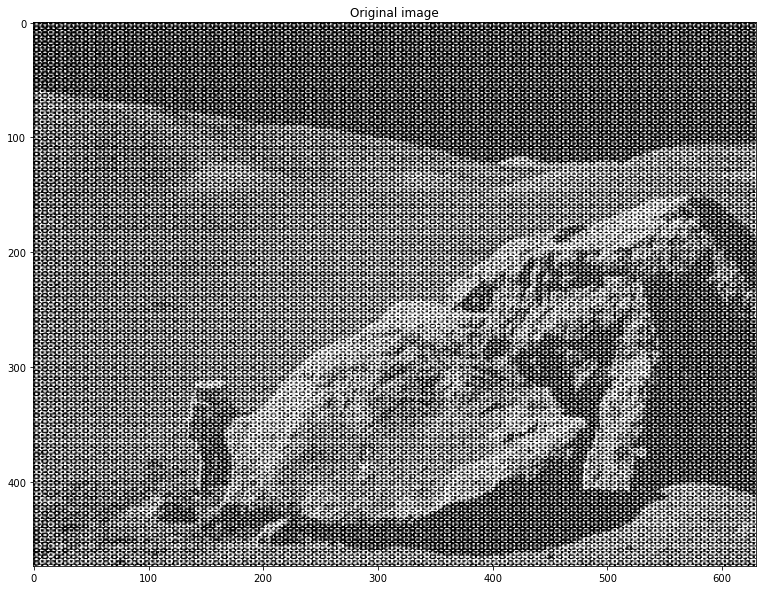

In [9]:
# importing the image as a 2D NumPy array
image = plt.imread('moonlanding.png')

# examining the image
fig, ax = plt.subplots(figsize=(20, 10))
ax.imshow(image, cmap='gray')
ax.set_title('Original image')
plt.show()

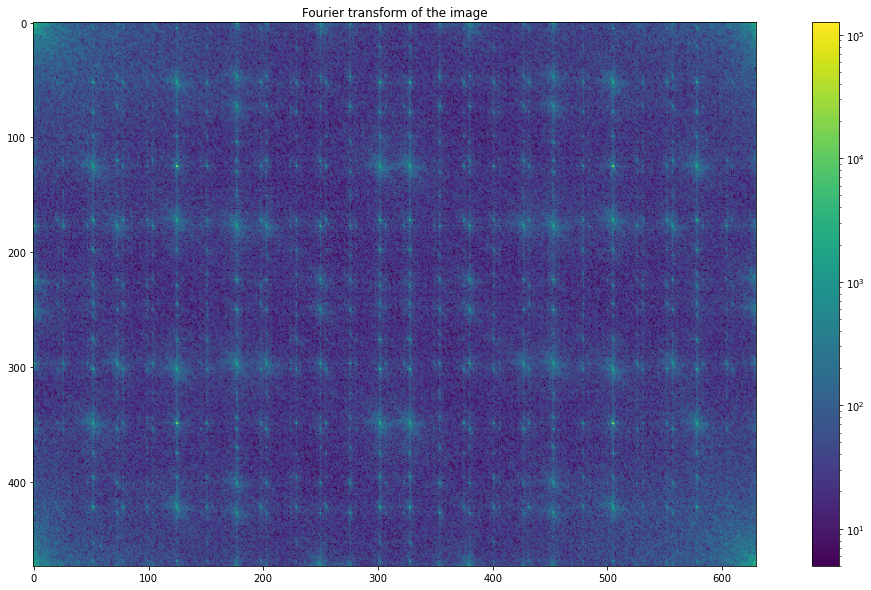

In [10]:
from matplotlib.colors import LogNorm

# computing the FFT of the image
image_fft = fftpack.fft2(image)

# plotting the Fourier transform of the image
fig, ax = plt.subplots(figsize=(20, 10))
plot = ax.imshow(np.abs(image_fft), norm=LogNorm(vmin=5))
fig.colorbar(plot)
ax.set_title('Fourier transform of the image')
plt.show()

It is observed that the periodic noise is contained in the high frequency region of the spectrum, i.e., in the lattice-like region of the spectrum.

Let's see what happens if this region is set to zero:

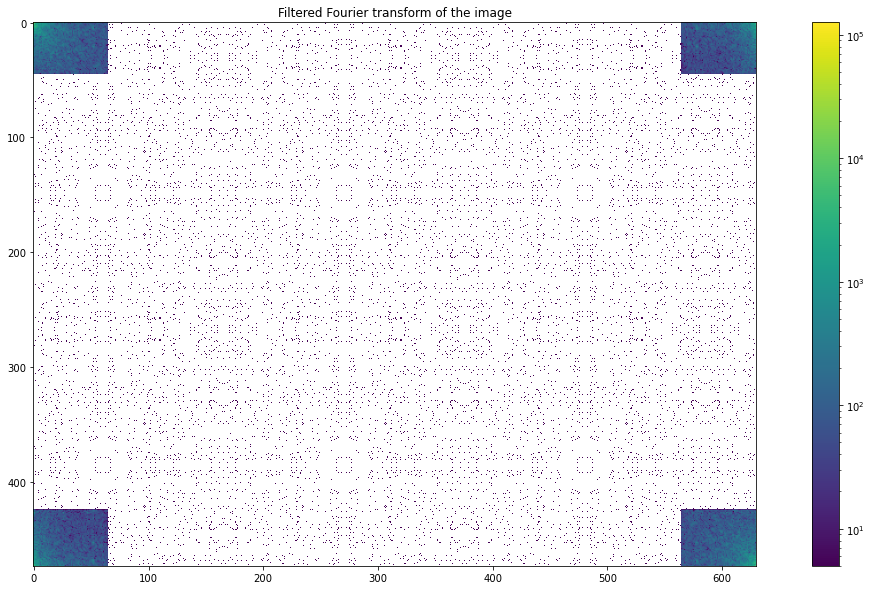

In [11]:
# defining a function that sets to 0 the region of the spectrum corresponding to:
# - rows with indices between 'row_low' and 'row_up'
# - columns with indices between 'column_low' and 'column_up'
def fft_denoise(image_fft, row_low, row_up, column_low, column_up):
    image_fft_filtered = image_fft.copy()
    image_fft_filtered[row_low:row_up, column_low:column_up] = 0
    return image_fft_filtered

# setting the presumed noise region of the spectrum to 0
image_fft_filtered = fft_denoise(image_fft, row_low=None, row_up=None, column_low=65, column_up=565)
image_fft_filtered = fft_denoise(image_fft_filtered, row_low=45, row_up=425, column_low=None, column_up=None)

# plotting the filtered Fourier transform of the image
fig, ax = plt.subplots(figsize=(20, 10))
plot = ax.imshow(np.abs(image_fft_filtered), norm=LogNorm(vmin=5))
fig.colorbar(plot)
ax.set_title('Filtered Fourier transform of the image')
plt.show()

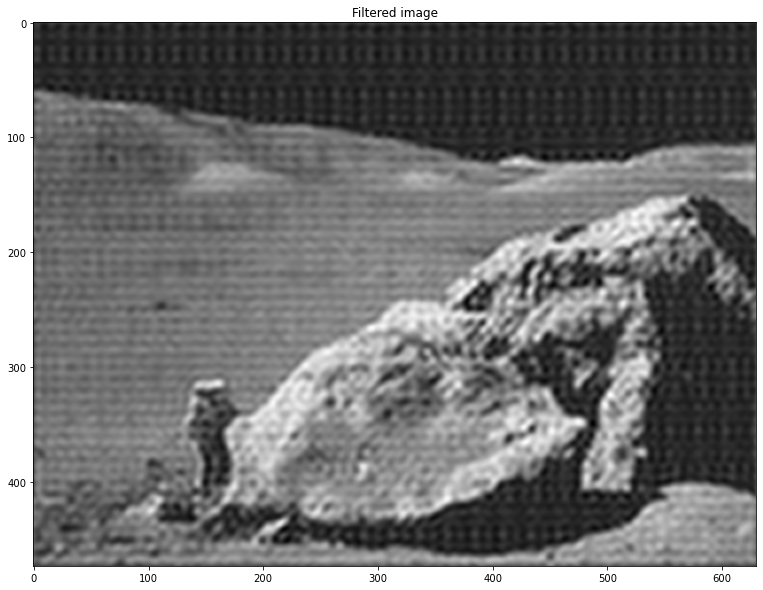

In [12]:
# applying the inverse Fourier transform to the filtered spectrum in order to reconstruct the filtered image
image_filtered = fftpack.ifft2(image_fft_filtered).real

# plotting the filtered image
fig, ax = plt.subplots(figsize=(20, 10))
ax.imshow(image_filtered, cmap='gray')
ax.set_title('Filtered image')
plt.show()